In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
plt.style.use('ggplot')

plot_params = dict(
    color = '0.75',
    markeredgecolor="0.25",
    markerfacecolor="0.25"
)

### Построение линейного уравнения парной регрессии

In [5]:
df = pd.DataFrame({'Прожиточный минимум': [79, 91, 77, 87, 84, 76, 84, 94, 79, 98, 81, 115], 
                   'Среднедневная З.П.': [134,154,128,138,133,144,160,149,125,163,120,162]})

In [23]:
from scipy.stats import pearsonr
pearsonr(df['Прожиточный минимум'], df['Среднедневная З.П.'])

PearsonRResult(statistic=0.708928585486849, pvalue=0.009842225933786732)

In [26]:
X = df['Прожиточный минимум']
y = df['Среднедневная З.П.']
n = df.shape[0]

result = stats.linregress(X, y)

b0 = result.intercept
b1 = result.slope
y_pred = b0 + b1*X
print("Уравнение регрессии: y = {:.2f}x + {:.2f}".format(b1, b0))

Уравнение регрессии: y = 0.95x + 59.38


### Коэффициент парной корреляции, коэффициент детерминации и средняя ошибка аппроксимации

In [27]:
r_coeff = 1 - sum((y - y_pred)**2)/ sum((y - y.mean())**2) # Коэффициент детерминации линейной регрессии
r_corr = np.sqrt(r_coeff)  # Коэффициент парной корреляции 
mean_approximation_error = np.mean(np.abs(y - y_pred)/ y) * 100 # Средняя ошибка аппроксимации
print("Уравнение регрессии: y = {:.2f}x + {:.2f}".format(b1, b0))
print(f'Коэффициент детерминации: {r_coeff}',
      f'\nКоэффициент парной корреляции: {r_corr}',
      f'\nСредняя ошибка аппроксимации: {mean_approximation_error}')

Уравнение регрессии: y = 0.95x + 59.38
Коэффициент детерминации: 0.5025797393203841 
Коэффициент парной корреляции: 0.7089285854868487 
Средняя ошибка аппроксимации: 5.927933469453759


### F-критерий Фишера оценки значимости линейной регрессии на уровне значимости alpha = 0.05 

In [20]:
alpha = 0.05
F_stat = r_coeff / (1-r_coeff) * ((n-2)/1)
F_critical = stats.f.ppf(1 - alpha, 1, n-2)
if F_stat > F_critical:
    print(f'F-статистика: {F_stat} > {F_critical}')
    print('Уравнение линейной регрессии является статистически значимым')
else:
    print(f'F-статистика: {F_stat} < {F_critical}')
    print('Уравнение линейной регрессии не является статистически значимым')

F-статистика: 10.103724738387596 > 4.9646027437307145
Уравнение линейной регрессии является статистически значимым


### t-критерий Стьюдента на уровне значимости alpha = 0.05 для параметров парной линейной регрессии

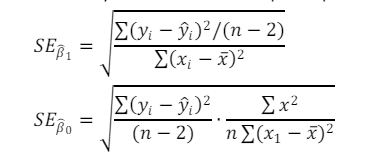

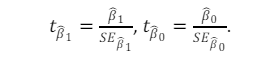

In [57]:
st_error_b1 = np.sqrt(sum((y - y_pred)**2) / ((n - 2)  * sum((X - X.mean())**2)))
st_error_b0 = np.sqrt((sum((y - y_pred)**2)*sum(X**2)) / ((n - 2) * n * sum((X - X.mean())**2)))

t_critical = stats.t.ppf(1 - alpha, n - 2)
print('Cлучайная ошибка коэфф. наклона: ', st_error_b1)
print('Cлучайная ошибка свободного члена: ', st_error_b0)

Cлучайная ошибка коэфф. наклона:  0.3002977616480973
Cлучайная ошибка свободного члена:  26.347456596886726


In [60]:
t_stat_b1 = b1 / st_error_b1
if abs(t_stat_b1) > t_critical:
    print(f't-статистика для коэффициента наклона b1: {t_stat_b1} > {t_critical}') 
    print('Коэффициент наклона является статистически значимым')
else:
    print(f't-статистика для коэффициента наклона b1: {t_stat_b1} <= {t_critical}') 
    print('Коэффициент наклона не является статистически значимым')

t-статистика для коэффициента наклона b1: 3.178635672483968 > 1.8124611228107335
Коэффициент наклона является статистически значимым


In [61]:
t_stat_b0 = b0 / st_error_b0

if abs(t_stat_b0) > t_critical:
    print(f't-статистика для свободного члена b0: {t_stat_b0} > {t_critical}') 
    print('Свободный член является статистически значимым')
else:
    print(f't-статистика для коэффициента наклона b1: {t_stat_b0} <= {t_critical}') 
    print('Свободный член не является статистически значимым')

t-статистика для свободного члена b0: 2.2535655603315545 > 1.8124611228107335
Свободный член является статистически значимым


### Прогноз заработной платы при прогнозном значении прожиточного минимума, состaвляющем 107% от среднего уровня

In [62]:
X_forecast = 1.07 * np.mean(X)
y_forecast = b0 + b1*X_forecast
print(f'Прогноз заработной платы: {y_forecast}')

Прогноз заработной платы: 148.3186995447648


### Ошибка прогноза и его доверительный интервал

In [63]:
forecast_error = np.sqrt(sum((y - y_pred)**2) / (n - 2)) * \
np.sqrt(1 + 1/n + (X_forecast - X.mean())**2 / ((n-1) * sum((X - X.mean())**2)))
forecast_error 

11.594389230699822

In [69]:
t_critical = stats.t.ppf(1 - alpha/2, df = n - 2)
conf_interval = np.array([y_forecast - t_critical * forecast_error,
                          y_forecast + t_critical * forecast_error])
print(f'Доверительный интервал для прогноза заработнрой платы: {conf_interval}')

Доверительный интервал для прогноза заработнрой платы: [122.48479044 174.15260865]


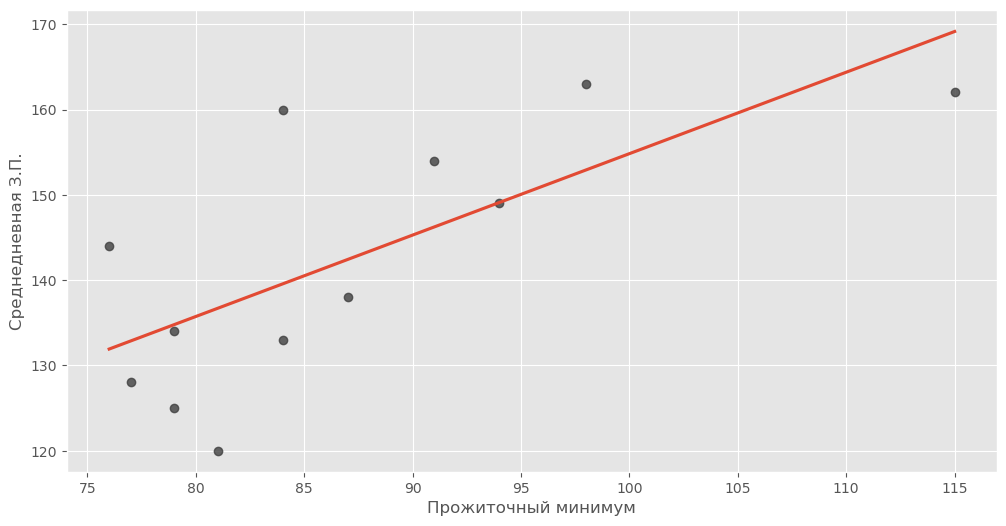

In [18]:
# линейная регрессия
fig, ax = plt.subplots(figsize= (12, 6))
ax = sns.regplot(x = 'Прожиточный минимум', y = 'Среднедневная З.П.', data = df, ci = False, scatter_kws=dict(color='0.25'))